# The Australian Cinema Industry 1980 to 2024
## By Andrew Legget
(Data courtesy of Screen Australia)

In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("AustralianCinema.csv", index_col = 0)

display(df.head())
print(df.info())

,Admissions(m),Gross_box_office(m),Population(m),Admissions_per_capita,Seats (000),Screens,Theatres,Average price
Year,,,,,,,,
1980,38.5,154.2,14.7,2.6,378,829,713,4.0
1981,38.7,174.3,14.9,2.6,384,842,723,4.5
1982,42.0,210.0,15.2,2.8,381,833,711,5.0
1983,37.1,208.0,15.4,2.4,395,863,737,5.6
1984,28.9,156.0,15.6,1.9,377,822,702,5.4


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1980 to 2024
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Admissions(m)          45 non-null     float64
 1   Gross_box_office(m)    45 non-null     float64
 2   Population(m)          45 non-null     float64
 3   Admissions_per_capita  45 non-null     float64
 4   Seats (000)            45 non-null     int64  
 5   Screens                45 non-null     int64  
 6   Theatres               45 non-null     int64  
 7   Average price          45 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.2 KB
None


### Part 1 - Box Office Performance

The best metric to guage performance of the Australian cinema industry is arguably the gross box office, which reflects the total value of cinema admissions (both quantity of admissions and the price paid for a ticket) for a given year.

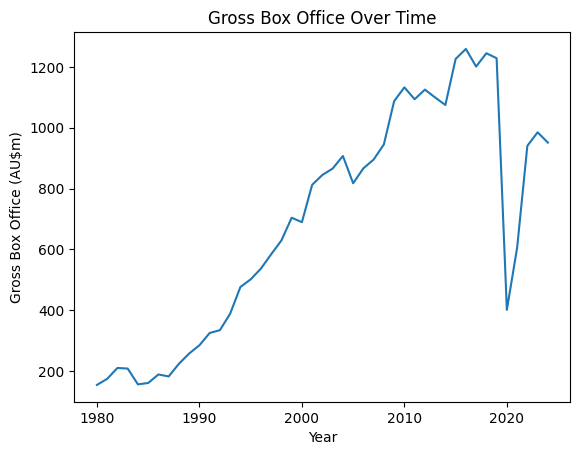

In [38]:
# Plot gross box office
plt.plot(df.index, df["Gross_box_office(m)"])
plt.xlabel("Year")
plt.ylabel("Gross Box Office (AU$m)")
plt.title("Gross Box Office Over Time")
plt.show()

Between 1980 and 2019, the gross box office (total admissions x by ticket price) increased at a reasonably linear rate. However, in 2020, as a result of the COVID pandemic which led to cinemas across the country closing, the box office plummeted. Although this event was short lived, the cinema industry has struggled to recover with the gross box office in 2022, 2023 and 2024 all significantly below the pre-pandemic levels.

<function matplotlib.pyplot.show(close=None, block=None)>

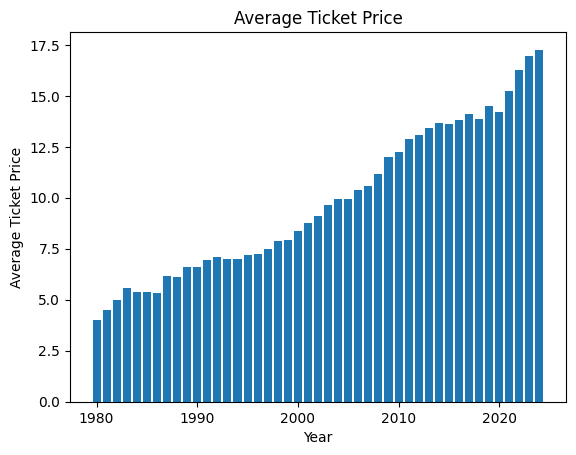

In [39]:
# Plot average ticket price
plt.bar(df.index, df["Average price"])
plt.xlabel("Year")
plt.ylabel("Average Ticket Price")
plt.title("Average Ticket Price")
plt.show

As shown above, while the gross box office has collapsed since the end of the pandemic, it is not due to ticket prices. In fact, since 1980, the average ticket price paid by moviegoers has largely increased at steady pace. This means that the drop in the total gross box office is due to fewer people going to the movies.

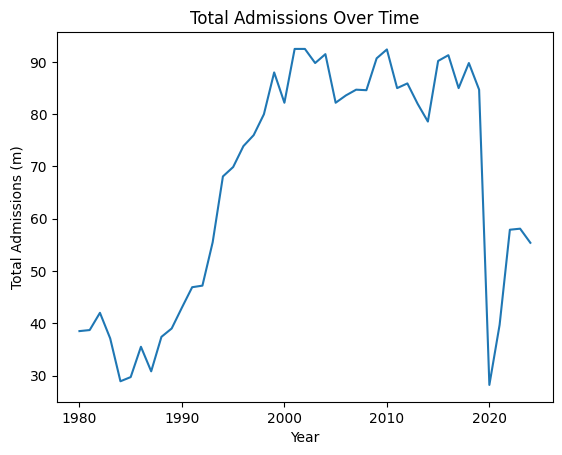

In [40]:
# Plot admissions
plt.plot(df.index, df["Admissions(m)"])
plt.xlabel("Year")
plt.ylabel("Total Admissions (m)")
plt.title("Total Admissions Over Time")
plt.show()

Indeed, this can be seen in the above plot. In fact, it highlights an issue that isn't easily seen in the gross box office numbers.

Admissions increased steadily from 1990 to around 2000. However, since then, admissions remained relatively flat -- hovering between 80 and 90 million people. This indicates very little growth in the amount of people going to the movies meaning that the growth we saw in the gross box office above was largely driven by increasing the ticket prices paid.

As we saw in the gross box office plot, the increased ticket prices have not been enough to prevent the collapse post-COVID where admissions are still significantly below the average level before the pandemic.

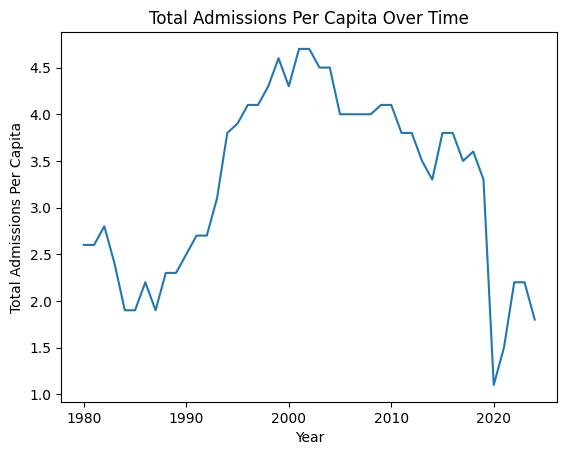

In [41]:
# Plot admissions per capital
plt.plot(df.index, df["Admissions_per_capita"])
plt.xlabel("Year")
plt.ylabel("Total Admissions Per Capita")
plt.title("Total Admissions Per Capita Over Time")
plt.show()

In [42]:
BoxOfficeMax = df["Gross_box_office(m)"].max()
Admissions2024 = df.loc[2024, "Admissions(m)"]
ImpliedPrice = BoxOfficeMax / Admissions2024
Price2024 = df.loc[2024, "Average price"]

print(ImpliedPrice.round(2))
print(((ImpliedPrice/Price2024-1)* 100).round(2))

22.73
31.7


Another way to look at this phenomenon is to look at admissions on a per capita basis.

If the general population was stagnant or declining, then the lack of growth in admissions would not necessarily be a problem, However, this has not been the case. In fact, even some of the early 2000s where admissions was stable, masked a decline in per capita admissions.

The overall conclusion is that the Australian cinema industry was already under pressure before activity was decimated by COVID and there is no sign yet that we can expect any reversion to the pre-COVID activity levels.

In fact, for 2024 to equal the record gross box office, cinemas would have needed to have charged approximatley $22.73 per ticket on average -- which was 31.7% higher than the average price for that year -- and hope that by doing so, that attendance stayed the same.

### Part 2: The Changing Face of Theatres

With fewer people attending cinemas, has there been any noticeable change in how cinemas are set out?

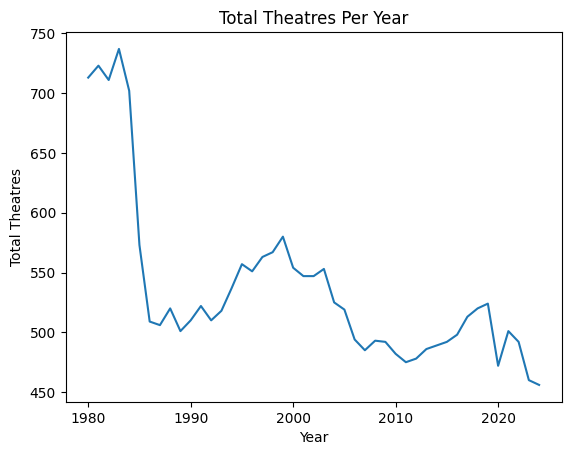

In [43]:
# Plot total theatres

plt.plot(df.index, df["Theatres"])
plt.xlabel("Year")
plt.ylabel("Total Theatres")
plt.title("Total Theatres Per Year")
plt.show()


After a significant fall off in the late 80s, the total number of theatres started to build until the late 90s after which, the total number of theatres started to steadily decline, a trend that continues to this day.

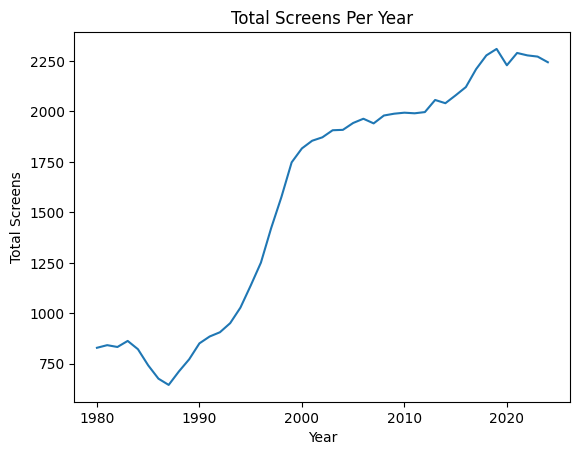

In [44]:
# Plot total screens

plt.plot(df.index, df["Screens"])
plt.xlabel("Year")
plt.ylabel("Total Screens")
plt.title("Total Screens Per Year")
plt.show()

However, while the total theatres declines, the total number of screens actually increased.

A potential reason for this could be the shift away from small, local, theatres and towards large multiplexes which are typically found in major shopping centres. These multiplexes were significantly larger in size than traditional theatres and as a result were able to house significantly more screens.

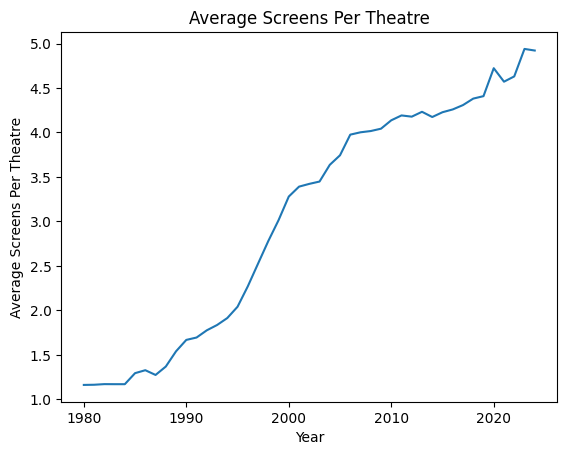

In [45]:
# Create new series to calculate the average number of screens per theatre per year
df["Screens Per Theatre"] = df["Screens"]/df["Theatres"]

# Create new plot for this metric
plt.plot(df.index, df["Screens Per Theatre"])
plt.xlabel("Year")
plt.ylabel("Average Screens Per Theatre")
plt.title("Average Screens Per Theatre")
plt.show()

The above plot of the average number of screens per theatre would agree with the multiplex hypothesis. Whilst there has been a decline in total theatres, the remaining theatres were operating with significantly higher average screens per theatre.

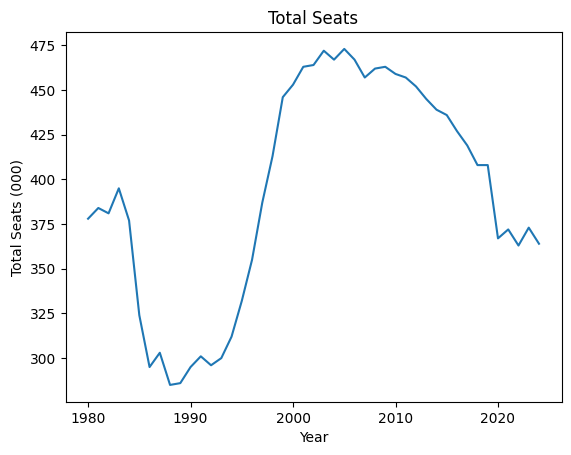

In [47]:
# Plot total seats
plt.plot(df.index, df["Seats (000)"])
plt.xlabel("Year")
plt.ylabel("Total Seats (000)")
plt.title("Total Seats")
plt.show()

Although the amount of screens has generally increased over time, the total amount of seats has declined since around 2005 to the point that the total seats that exist in Australian cinemas is approximatley 100,000 less than its peak.

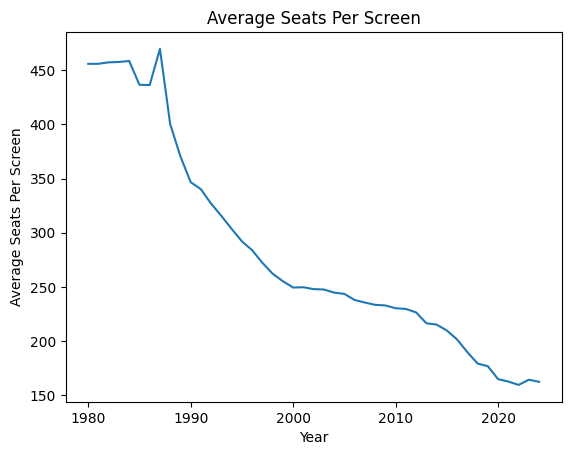

In [ ]:
# Create new series to calculate the average number of seats per screen per year
df["Seats Per Screen"] = df["Seats (000)"]/df["Screens"]

# Create new plot for this metric
plt.plot(df.index, df["Seats Per Screen"] * 1000)
plt.xlabel("Year")
plt.ylabel("Average Seats Per Screen")
plt.title("Average Seats Per Screen")
plt.show()

When calculating the average seats per screen, this shift becomes even more pronounced.

Where as in 1980, there would, on average, be around 450 seats available to watch a film, as of 2024, just over 150 seats would be available to watch a movie.





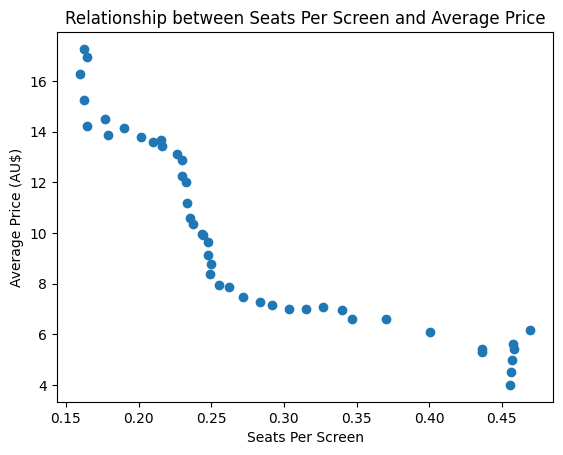

In [52]:
# Plot Average Seats Per Screen vs Average Price
plt.scatter(df["Seats Per Screen"], df["Average price"])
plt.xlabel("Seats Per Screen")
plt.ylabel("Average Price (AU$)")
plt.title("Relationship between Seats Per Screen and Average Price")
plt.show()



While the total number of seats per screen has been falling, it has largely come with higher ticket prices.

### Conclusion

The Australian cinema industry appears to be in a difficult situation.

Even before the pandemic temporarily halted activity, there was already evidence that fewer people were interested in going to see movies in theatres. However, thanks to increasing ticket prices, the industry still managed to generate a tiny amount of growth or at least kept the total box office stable.

As this was occuring, the business model for cinemas shifted away from small theatres to multiplexes which could exhibit multiple films at any particular time and in doing so, hopefully, maximise its audience. Although even here, in more recent years, theatres have had to shift its strategy to having more screens per theatre but fewer seats per screen while charging premium prices.

Unforunatley, post-COVID, eeven this strategy is under pressure as total admissions has collapsed to levels not seen in over a decade with little sign yet of any meaningful improvement or reversion to activity levels seen before the pandemic.

If Australian cinemas can't entice more people back to theatres, then it will again likely lead to operators needing to adjust their business model -- perhaps towards further premiumisation to jutsify even higher ticket prices.